## Libraries

In [1]:
import numpy as np
from Contents.params import*
from Contents.irradiance import calc_irradiance
from Contents.read_images import read_list_of_images
from Contents.remove_out_layers import remove_out_layers
from Contents.curve_calibration import get_curve_calibration
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import NullLocator

## Read images

In [2]:
images = read_list_of_images(
    list_of_files = list_of_files, 
    exposures = exposures)

## Plotting images

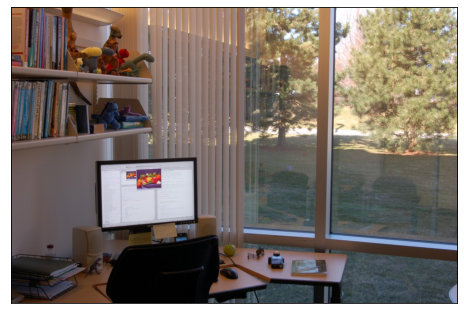

In [3]:
fig, ax = plt.subplots(figsize = (8,6))

ax.imshow(images[.625])

plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())

## Read calibration curve

In [4]:
calibration_curve = get_curve_calibration(filepath = "curve.m")

## Irradiance calculate

In [5]:
Em = calc_irradiance(
    images = images, 
    calibration_curve = calibration_curve)

## Plotting image HDR

In [18]:
mult_exposures = np.array([20,50,60,80])

images_HDR = []

for exposure in mult_exposures:
    images_HDR.append(remove_out_layers((Em*exposure).astype(int)))

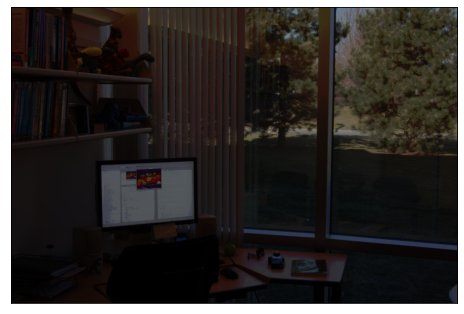

In [19]:
fig, ax = plt.subplots(figsize = (8,6))

ax.imshow(images_HDR[0])

plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())

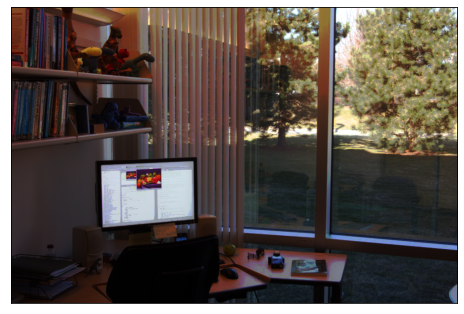

In [20]:
fig, ax = plt.subplots(figsize = (8,6))

ax.imshow(images_HDR[1])

plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())

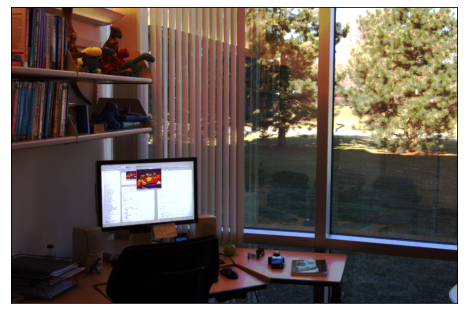

In [21]:
fig, ax = plt.subplots(figsize = (8,6))

ax.imshow(images_HDR[2])

plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())

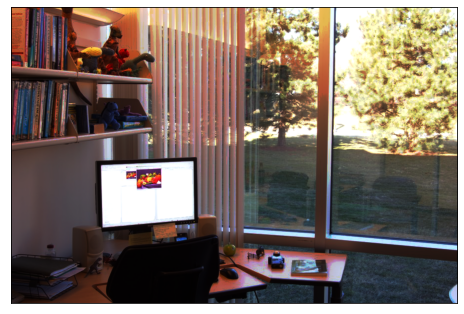

In [22]:
fig, ax = plt.subplots(figsize = (8,6))

ax.imshow(images_HDR[3])

plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())

In [62]:
gamma = 1.0

image = (images_HDR[3].copy()).astype(float)

L = .299*image[:,:,0] + .587*image[:,:,1] + .114*image[:,:,2]

s = L.shape

n = s[0]*s[1]

Ln = np.exp(np.sum(np.log(L + gamma))/n)

In [63]:
alpha = .18

LS = (alpha/Ln)*L

In [64]:
LG = LS/(1+LS)

In [65]:
img = images_HDR[3].copy()
img_LG = np.zeros_like(img, dtype = np.float64)
img_LG[:,:,0] = img[:,:,0]*LG
img_LG[:,:,1] = img[:,:,1]*LG
img_LG[:,:,2] = img[:,:,2]*LG

In [66]:
img_LG = img_LG.astype(int)

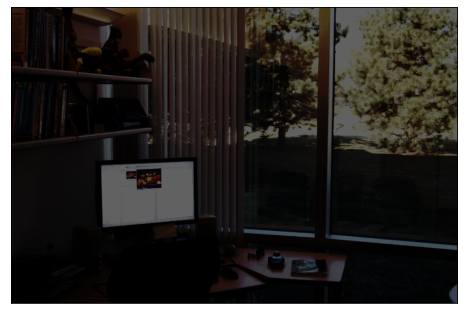

In [67]:
fig, ax = plt.subplots(figsize = (8,6))

ax.imshow(img_LG)

plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())